In [1]:
from keras.applications import vgg16

In [2]:
conv_base = vgg16.VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))

In [3]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [4]:
conv_base.trainable = True

In [5]:
set_trainable = False
for layers in conv_base.layers:
    if layers.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layers.trainable = True
    else:
        layers.trainable = False

In [6]:
from keras import models
from keras import layers

In [7]:
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               2097408   
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 9,177,089
Non-trainable params: 7,635,264
_________________________________________________________________


In [9]:
from keras.preprocessing.image import ImageDataGenerator

In [10]:
from keras import optimizers

In [11]:
train_datagen = ImageDataGenerator(
rescale = 1./255,
rotation_range = 40,
width_shift_range = 0.2,
height_shift_range = 0.2,
shear_range = 0.2,
zoom_range = 0.2,
horizontal_flip = True,
fill_mode = 'nearest')

In [12]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [13]:
import os

In [14]:
base_dir = r'C:\Users\ahsaa\Desktop\cats_and_dogs_small'
train_dir = os.path.join(base_dir, 'train')b
validation_dir = os.path.join(base_dir, 'validation')

In [19]:
train_generator = train_datagen.flow_from_directory(
train_dir,
target_size=(150, 150),
batch_size=20,
class_mode='binary')

Found 2000 images belonging to 2 classes.


In [20]:
validation_generator = test_datagen.flow_from_directory(
validation_dir,
target_size=(150, 150),
batch_size=20,
class_mode='binary')

Found 1000 images belonging to 2 classes.


In [21]:
model.compile(loss='binary_crossentropy',
             optimizer=optimizers.RMSprop(learning_rate=2e-5),
              metrics=['acc'])

In [22]:
history = model.fit(
train_generator,
steps_per_epoch = 100,
epochs=100,
validation_data = validation_generator,
validation_steps=50)

Epoch 1/100
100/100 [==============================] - 36s 118ms/step - loss: 0.5549 - acc: 0.7140 - val_loss: 0.2952 - val_acc: 0.8750
Epoch 2/100
100/100 [==============================] - 10s 102ms/step - loss: 0.3348 - acc: 0.8512 - val_loss: 0.2792 - val_acc: 0.8790
Epoch 3/100
100/100 [==============================] - 10s 103ms/step - loss: 0.3094 - acc: 0.8627 - val_loss: 0.2007 - val_acc: 0.9170
Epoch 4/100
100/100 [==============================] - 10s 102ms/step - loss: 0.2379 - acc: 0.8965 - val_loss: 0.1740 - val_acc: 0.9220
Epoch 5/100
100/100 [==============================] - 10s 102ms/step - loss: 0.2161 - acc: 0.9131 - val_loss: 0.1729 - val_acc: 0.9330
Epoch 6/100
100/100 [==============================] - 10s 104ms/step - loss: 0.1960 - acc: 0.9197 - val_loss: 0.1555 - val_acc: 0.9330
Epoch 7/100
100/100 [==============================] - 10s 103ms/step - loss: 0.2024 - acc: 0.9173 - val_loss: 0.1889 - val_acc: 0.9240
Epoch 8/100
100/100 [===========================

In [23]:
model.save("Fine_Tunning.h5")

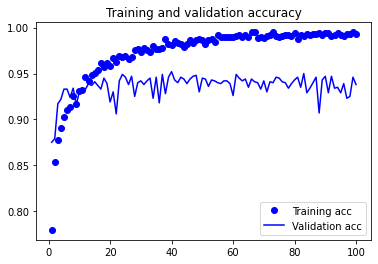

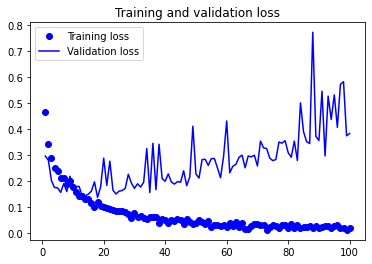

In [24]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [27]:
def smooth_curve(points, factor=0.8):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

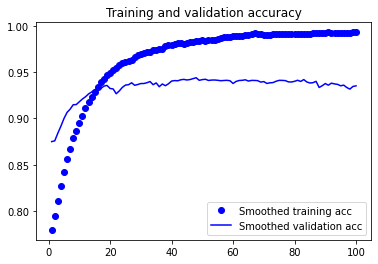

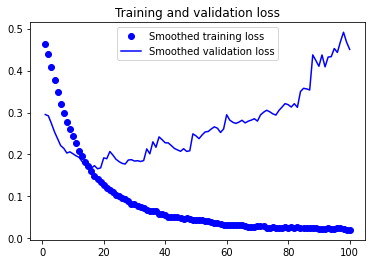

In [28]:
plt.plot(epochs,
smooth_curve(acc), 'bo', label='Smoothed training acc')
plt.plot(epochs,
smooth_curve(val_acc), 'b', label='Smoothed validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs,
smooth_curve(loss), 'bo', label='Smoothed training loss')
plt.plot(epochs,
smooth_curve(val_loss), 'b', label='Smoothed validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [31]:
test_dir = r"C:\Users\ahsaa\Desktop\cats_and_dogs_small\test"
test_generator = test_datagen.flow_from_directory(
test_dir,
target_size=(150, 150),
batch_size=20,
class_mode='binary')
test_loss, test_acc = model.evaluate(test_generator, steps=50)

print('test acc:', test_acc)

Found 1000 images belonging to 2 classes.
50/50 [==============================] - 1s 27ms/step - loss: 0.5521 - acc: 0.9440
test acc: 0.9440000057220459
